# EDA

The main focus for this notebook will be loading the data and performing simple EDA steps

In [0]:
# install requirements
%pip install -r '/dbfs/mnt/sdscdata/requirements.txt'

Python interpreter will be restarted.
Requirement already satisfied: keras-nightly==2.5.0.dev2021032900 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 1)) (2.5.0.dev2021032900)
Requirement already satisfied: tensorflow==2.5.0 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 2)) (2.5.0)
Requirement already satisfied: scikit-image==0.17.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 3)) (0.17.2)
Requirement already satisfied: scikit-learn==0.24.1 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 4)) (0.24.1)
Requirement already satisfied: labelme==4.5.9 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (4.5.9)
Requirement already satisfied: pycocotools==2.0.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 6)) (2.0.2)
Requirement already satisfied: scipy==1.6.2 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 7)) (1.6.2)
Requirement already satisfied: tqdm==4.62.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 8)) (4.62.2)
Requirement already satisfied: h5py==3.1.0 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 9)) (3.1.0)
Requirement already satisfied: numpy==1.19.2 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 10)) (1.19.2)
Requirement already satisfied: pandas==1.2.4 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (1.2.4)
Requirement already satisfied: matplotlib<3.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (3.2.2)
Requirement already satisfied: Pillow>=2.8.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (8.4.0)
Requirement already satisfied: PyYAML in /databricks/python3/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (5.4.1)
Requirement already satisfied: imgviz>=0.11.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (1.4.1)
Requirement already satisfied: qtpy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (1.11.2)
Requirement already satisfied: termcolor in /databricks/python3/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (1.1.0)
Requirement already satisfied: PyQt5!=5.15.3,!=5.15.4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (5.15.5)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas==1.2.4->-r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (2020.5)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas==1.2.4->-r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (2.8.1)
Requirement already satisfied: setu

In [0]:
%pip install scikit-multilearn

Python interpreter will be restarted.
Requirement already satisfied: scikit-multilearn in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (0.2.0)
WARNING: You are using pip version 21.0.1; however, version 21.3.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

### First we install the necessary requirements and load some functions defined in other notebooks

In [0]:
# import the needed libraries
import time
import json
import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from pathlib import Path
import labelme

In [0]:
%run ./maskrcnn

In [0]:
%run ./labelme

In [0]:
%run ./helpers

### Let's have a look into our folder structure and what data we have available

These locations should already be mounted in your environments as well.

After executing the cell below in your environment you should be able to see 2 mounted points --> If not please let us know via the communciation plattform (Teams) and we will have a look:
* sdscdata: where all data is provided to you. All teams can access this point but only with read access.
* teamxxstorage: This is your team specific storage account. You can use this to store processed files, your trained model_weights. This is also the location we expect your submissions to be placed.

In [0]:
dbutils.fs.ls("/mnt/")[0:2]

Out[24]: [FileInfo(path='dbfs:/mnt/sdscdata/', name='sdscdata/', size=0),
 FileInfo(path='dbfs:/mnt/team32storage/', name='team32storage/', size=0)]

In [0]:
dbutils.fs.ls("/mnt/sdscdata/")

Out[25]: [FileInfo(path='dbfs:/mnt/sdscdata/data/', name='data/', size=0),
 FileInfo(path='dbfs:/mnt/sdscdata/models/', name='models/', size=0),
 FileInfo(path='dbfs:/mnt/sdscdata/requirements.txt', name='requirements.txt', size=208)]

In [0]:
dbutils.fs.ls("/mnt/sdscdata/data/visualisations")

Out[26]: [FileInfo(path='dbfs:/mnt/sdscdata/data/visualisations/46.5895409617622_14.267120361328125.jpg', name='46.5895409617622_14.267120361328125.jpg', size=36746),
 FileInfo(path='dbfs:/mnt/sdscdata/data/visualisations/46.5895409617622_14.267120361328125.png', name='46.5895409617622_14.267120361328125.png', size=11769),
 FileInfo(path='dbfs:/mnt/sdscdata/data/visualisations/47.787786882192975_13.058624267578125.jpg', name='47.787786882192975_13.058624267578125.jpg', size=38682),
 FileInfo(path='dbfs:/mnt/sdscdata/data/visualisations/47.787786882192975_13.058624267578125.png', name='47.787786882192975_13.058624267578125.png', size=10216),
 FileInfo(path='dbfs:/mnt/sdscdata/data/visualisations/U_net_architecture.png', name='U_net_architecture.png', size=114806),
 FileInfo(path='dbfs:/mnt/sdscdata/data/visualisations/cats.jpg', name='cats.jpg', size=83714),
 FileInfo(path='dbfs:/mnt/sdscdata/data/visualisations/f1.png', name='f1.png', size=24879),
 FileInfo(path='dbfs:/mnt/sdscdata/data/visualisations/prec_rec.png', name='prec_rec.png', size=82979),
 FileInfo(path='dbfs:/mnt/sdscdata/data/visualisations/u_net_adapted.png', name='u_net_adapted.png', size=107442)]

In [0]:
dbutils.fs.ls("/mnt/sdscdata/data/raw/train")

Out[27]: [FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.588597200313345_14.267120361328125.jpeg', name='46.588597200313345_14.267120361328125.jpeg', size=40578),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.588597200313345_14.267120361328125.json', name='46.588597200313345_14.267120361328125.json', size=64980),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.588597200313345_14.26849365234375.jpeg', name='46.588597200313345_14.26849365234375.jpeg', size=33035),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.588597200313345_14.26849365234375.json', name='46.588597200313345_14.26849365234375.json', size=51975),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.588597200313345_14.269866943359375.jpeg', name='46.588597200313345_14.269866943359375.jpeg', size=32877),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.588597200313345_14.269866943359375.json', name='46.588597200313345_14.269866943359375.json', size=51880),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.5895409617622_14.267120361328125.jpeg', name='46.5895409617622_14.267120361328125.jpeg', size=36746),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.5895409617622_14.267120361328125.json', name='46.5895409617622_14.267120361328125.json', size=83395),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.5895409617622_14.26849365234375.jpeg', name='46.5895409617622_14.26849365234375.jpeg', size=30872),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.5895409617622_14.26849365234375.json', name='46.5895409617622_14.26849365234375.json', size=60268),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.5895409617622_14.269866943359375.jpeg', name='46.5895409617622_14.269866943359375.jpeg', size=32363),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.5895409617622_14.269866943359375.json', name='46.5895409617622_14.269866943359375.json', size=63369),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.59048470677854_14.267120361328125.jpeg', name='46.59048470677854_14.267120361328125.jpeg', size=38645),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.59048470677854_14.267120361328125.json', name='46.59048470677854_14.267120361328125.json', size=73848),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.59048470677854_14.26849365234375.jpeg', name='46.59048470677854_14.26849365234375.jpeg', size=27620),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.59048470677854_14.26849365234375.json', name='46.59048470677854_14.26849365234375.json', size=55652),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.59048470677854_14.269866943359375.jpeg', name='46.59048470677854_14.269866943359375.jpeg', size=30320),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.59048470677854_14.269866943359375.json', name='46.59048470677854_14.269866943359375.json', size=55601),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.61548796222357_14.26300048828125.jpeg', name='46.61548796222357_14.26300048828125.jpeg', size=41512),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.61548796222357_14.26300048828125.json', name='46.61548796222357_14.26300048828125.json', size=111314),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.61548796222357_14.264373779296875.jpeg', name='46.61548796222357_14.264373779296875.jpeg', size=36147),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.61548796222357_14.264373779296875.json', name='46.61548796222357_14.264373779296875.json', size=100900),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.61548796222357_14.2657470703125.jpeg', name='46.61548796222357_14.2657470703125.jpeg', size=35560),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.61548796222357_14.2657470703125.json', name='46.61548796222357_14.2657470703125.json', size=54179),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.61643125535799_14.26300048828125.jpeg', name='46.61643125535799_14.26300048828125.jpeg', size=28091),
 FileInfo(path='dbfs:/mnt/sdscdata/data/raw/train/46.61643125535799_14.26300048828125.json

In [0]:
print("Training dataset size:", int(len(dbutils.fs.ls("/mnt/sdscdata/data/raw/train"))/2))
print("Testing dataset size:", int(len(dbutils.fs.ls("/mnt/sdscdata/data/raw/test"))))

Training dataset size: 340
Testing dataset size: 98

In [0]:
with open('/dbfs/mnt/sdscdata/data/raw/labels.txt') as f:
    lines = f.readlines()
    
print(lines)

['__ignore__\n', '_background_\n', 'asphalt\n', 'sealed_other\n', 'gravel_clay\n', 'field\n', 'water\n', 'meadow\n', 'lawn\n', 'pool\n', 'roof_other\n', 'roof_flat_residential\n', 'roof_pitched_industrial\n', 'roof_flat_industrial\n', 'roof_pitched_residential\n', 'hedge\n', 'tree_group\n', 'tree\n', 'vehicle']

In [0]:
# Team specific folder (replace teamadminstorage to your team e.g. team01storage)
TEAM_MOUNT = '/mnt/team32storage/'
IMAGE_SIZE = 512

In [0]:
dbutils.fs.ls(TEAM_MOUNT+'/models')

Out[31]: [FileInfo(path='dbfs:/mnt/team32storage/models/.init', name='.init', size=0),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_catCE_dropout_02.h5', name='unet_aug_catCE_dropout_02.h5', size=23526908),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_cat_CE_dropout_02.h5', name='unet_aug_cat_CE_dropout_02.h5', size=23526908),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_diceloss.h5', name='unet_aug_diceloss.h5', size=26357524)]

### Let's see what we are working with

Now we have our needed data available to work with. Let's take a look into some more things available for us:

* how some of the images and masks look like (we just load the png masks here)
* what kind of labels we are working with
* what information we have available to later assign the biodiversity, emmission and pv scores to each Image

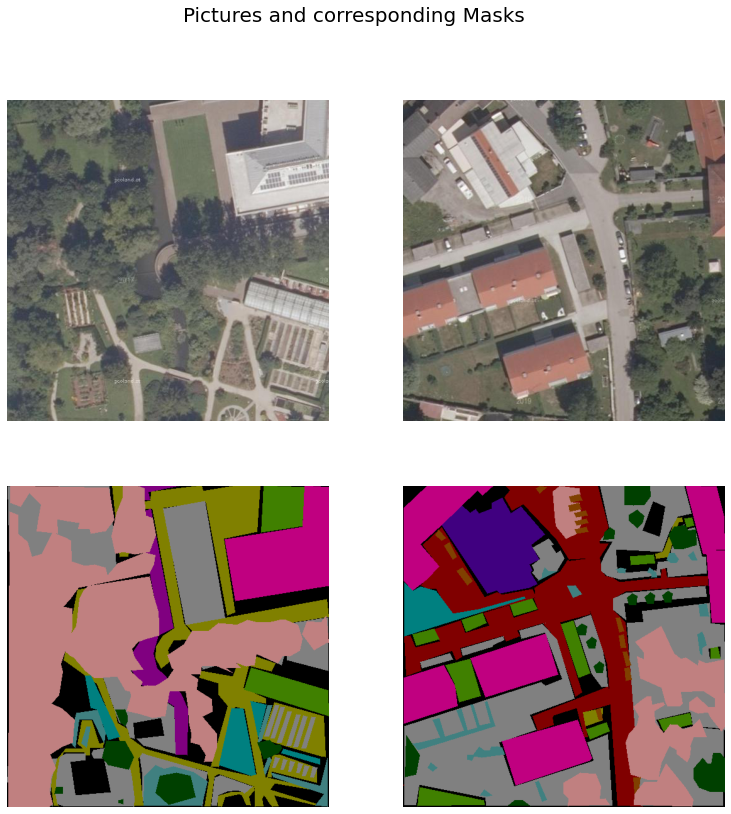

In [0]:
# Lets have a look at some sample images and masks
display_masks_imgs('/dbfs/mnt/sdscdata/data/visualisations/47.787786882192975_13.058624267578125.jpg', '/dbfs/mnt/sdscdata/data/visualisations/46.5895409617622_14.267120361328125.jpg')

In [0]:
# Lets have a look into the labels we are working with, and the scores for the three sub use cases
label_scores = pd.read_csv('/dbfs/mnt/sdscdata/data/raw/label_scores.csv', sep=';')
labels = list(label_scores.labels.values)
label_scores

Out[33]:

,labels,CO2,usable_area,biodiversity
0,BG,0.00,0.00,0.00
1,asphalt,0.00,0.00,0.00
2,sealed_other,0.00,0.00,0.00
3,gravel_clay,0.00,0.00,0.15
4,field,0.00,0.00,0.00
5,water,0.52,0.00,1.70
6,meadow,0.24,0.00,2.50
7,lawn,0.02,0.10,0.50
8,pool,0.00,0.00,0.00
9,roof_other,0.00,0.30,0.00


In [0]:
# SA --> mean yearly sum of hours of sun over last years
weather = pd.read_csv('/dbfs/mnt/sdscdata/data/raw/weather_station_file.csv', sep=',')
weather[["LAT", "LON", "SA"]].head(10)


Out[34]:

,LAT,LON,SA
0,47.9508,16.8417,2002.0
1,47.8539,16.5386,1999.0
2,47.2075,16.3356,1953.0
3,46.6483,14.3183,1981.0
4,46.9586,14.4058,1639.0
5,46.6772,13.9019,1914.0
6,46.6036,13.6733,2052.0
7,46.4911,14.5944,1743.0
8,46.6311,14.1664,1840.0
9,46.7419,13.0828,1939.0


### Load the data

Different models might expect different input formats, labelme (the tool we used to annotate the pictures) already provides some small scripts to transform the jsons it creates to some common formats. In labelall we are using two of these slightly adapted scripts. One to get the individual jsons to a single json following the coco annotation format and one to create actual image masks out of it (for the second session).

Also, the data so far is only split into a train set we can use for training and validation and a test set from which the final score will be calculated. Let's split train into a train and validation, so we can later get an idea how our models are performing.

In [0]:
train_jpg = []
train_json = []
for file in dbutils.fs.ls("/mnt/sdscdata/data/raw/train"):
  if(file.name[-4:] == 'jpeg'):
    train_jpg.append(file.name)
  if(file.name[-4:] == 'json'):
    train_json.append(file.name)

train_jpg

Out[35]: ['46.588597200313345_14.267120361328125.jpeg',
 '46.588597200313345_14.26849365234375.jpeg',
 '46.588597200313345_14.269866943359375.jpeg',
 '46.5895409617622_14.267120361328125.jpeg',
 '46.5895409617622_14.26849365234375.jpeg',
 '46.5895409617622_14.269866943359375.jpeg',
 '46.59048470677854_14.267120361328125.jpeg',
 '46.59048470677854_14.26849365234375.jpeg',
 '46.59048470677854_14.269866943359375.jpeg',
 '46.61548796222357_14.26300048828125.jpeg',
 '46.61548796222357_14.264373779296875.jpeg',
 '46.61548796222357_14.2657470703125.jpeg',
 '46.61643125535799_14.26300048828125.jpeg',
 '46.61643125535799_14.264373779296875.jpeg',
 '46.61643125535799_14.2657470703125.jpeg',
 '46.61737453206076_14.26300048828125.jpeg',
 '46.61737453206076_14.264373779296875.jpeg',
 '46.61737453206076_14.2657470703125.jpeg',
 '46.676296720769706_13.98284912109375.jpeg',
 '46.676296720769706_13.984222412109375.jpeg',
 '46.676296720769706_13.985595703125.jpeg',
 '46.677238954126864_13.98284912109375.jpeg',
 '46.677238954126864_13.984222412109375.jpeg',
 '46.677238954126864_13.985595703125.jpeg',
 '46.67818117105439_13.98284912109375.jpeg',
 '46.67818117105439_13.984222412109375.jpeg',
 '46.67818117105439_13.985595703125.jpeg',
 '46.96525940034928_15.453643798828125.jpeg',
 '46.96525940034928_15.45501708984375.jpeg',
 '46.96525940034928_15.456390380859375.jpeg',
 '46.96619658317044_15.453643798828125.jpeg',
 '46.96619658317044_15.45501708984375.jpeg',
 '46.96619658317044_15.456390380859375.jpeg',
 '46.967133749572525_15.453643798828125.jpeg',
 '46.967133749572525_15.45501708984375.jpeg',
 '46.967133749572525_15.456390380859375.jpeg',
 '47.036906472584874_15.455703735351562.jpeg',
 '47.036906472584874_15.457077026367188.jpeg',
 '47.036906472584874_15.458450317382812.jpeg',
 '47.037842399454185_15.455703735351562.jpeg',
 '47.037842399454185_15.457077026367188.jpeg',
 '47.037842399454185_15.458450317382812.jpeg',
 '47.03877830990729_15.455703735351562.jpeg',
 '47.03877830990729_15.457077026367188.jpeg',
 '47.03877830990729_15.458450317382812.jpeg',
 '47.057493071624975_15.459136962890625.jpeg',
 '47.057493071624975_15.46051025390625.jpeg',
 '47.057493071624975_15.461883544921875.jpeg',
 '47.058428637346594_15.459136962890625.jpeg',
 '47.058428637346594_15.46051025390625.jpeg',
 '47.058428637346594_15.461883544921875.jpeg',
 '47.05936418665284_15.459136962890625.jpeg',
 '47.05936418665284_15.46051025390625.jpeg',
 '47.05936418665284_15.461883544921875.jpeg',
 '47.15984001304431_16.165695190429688.jpeg',
 '47.15984001304431_16.167068481445312.jpeg',
 '47.15984001304431_16.168441772460938.jpeg',
 '47.16077378151659_16.165695190429688.jpeg',
 '47.16077378151659_16.167068481445312.jpeg',
 '47.16077378151659_16.168441772460938.jpeg',
 '47.16170753357783_16.165695190429688.jpeg',
 '47.16170753357783_16.167068481445312.jpeg',
 '47.16170753357783_16.168441772460938.jpeg',
 '47.26338813315704_11.3433837890625.jpeg',
 '47.26338813315704_11.344757080078125.jpeg',
 '47.26338813315704_11.34613037109375.jpeg',
 '47.264320080254784_11.3433837890625.jpeg',
 '47.264320080254784_11.344757080078125.jpeg',
 '47.264320080254784_11.34613037109375.jpeg',
 '47.265252010946085_11.3433837890625.jpeg',
 '47.265252010946085_11.344757080078125.jpeg',
 '47.265252010946085_11.34613037109375.jpeg',
 '47.284352974617114_16.208267211914062.jpeg',
 '47.284352974617114_16.209640502929688.jpeg',
 '47.284352974617114_16.211013793945312.jpeg',
 '47.28528455258006_11.520538330078125.jpeg',
 '47.28528455258006_11.52191162109375.jpeg',
 '47.28528455258006_11.523284912109375.jpeg',
 '47.28528455258006_16.208267211914062.jpeg',
 '47.28528455258006_16.209640502929688.jpeg',
 '47.28528455258006_16.211013793945312.jpeg',
 '47.286216114137524_11.520538330078125.jpeg',
 '47.286216114137524_11.52191162109375.jpeg',
 '47.286216114137524_11.523284912109375.jpeg',
 '47.286216114137524_16.208267211914062.jpeg',
 '47.286216114137524_16.209640502929688.jpeg',
 '47.286216114137524_16.211013793945312.j

In [0]:
# Lets have a look into the labels we are working with, and the scores for the three sub use cases
label_scores = pd.read_csv('/dbfs/mnt/sdscdata/data/raw/label_scores.csv', sep=';')
labels = list(label_scores.labels.values)
labels

Out[36]: ['BG',
 'asphalt',
 'sealed_other',
 'gravel_clay',
 'field',
 'water',
 'meadow',
 'lawn',
 'pool',
 'roof_other',
 'roof_flat_industrial',
 'roof_pitched_industrial',
 'roof_flat_residential',
 'roof_pitched_residential',
 'hedge',
 'tree_group',
 'tree',
 'vehicle']

In [0]:
%run ./custom_functions

Python interpreter will be restarted.
Requirement already satisfied: labelme in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (4.5.9)
Requirement already satisfied: matplotlib<3.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from labelme) (3.2.2)
Requirement already satisfied: Pillow>=2.8.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from labelme) (8.4.0)
Requirement already satisfied: PyYAML in /databricks/python3/lib/python3.8/site-packages (from labelme) (5.4.1)
Requirement already satisfied: imgviz>=0.11.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from labelme) (1.4.1)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from labelme) (1.19.2)
Requirement already satisfied: qtpy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from labelme) (1.11.2)
Requirement already satisfied: termcolor in /databricks/python3/lib/python3.8/site-packages (from labelme) (1.1.0)
Requirement already satisfied: PyQt5!=5.15.3,!=5.15.4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from labelme) (5.15.5)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (1.3.1)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (2.8.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib<3.3->labelme) (1.15.0)
Requirement already satisfied: PyQt5-sip<13,>=12.8 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from PyQt5!=5.15.3,!=5.15.4->labelme) (12.9.0)
Requirement already satisfied: PyQt5-Qt5>=5.15.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/lib/python3.8/site-packages (from PyQt5!=5.15.3,!=5.15.4->labelme) (5.15.2)
WARNING: You are using pip version 21.0.1; however, version 21.3.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-69c5806b-700c-4c06-bb61-5a63e946026d/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

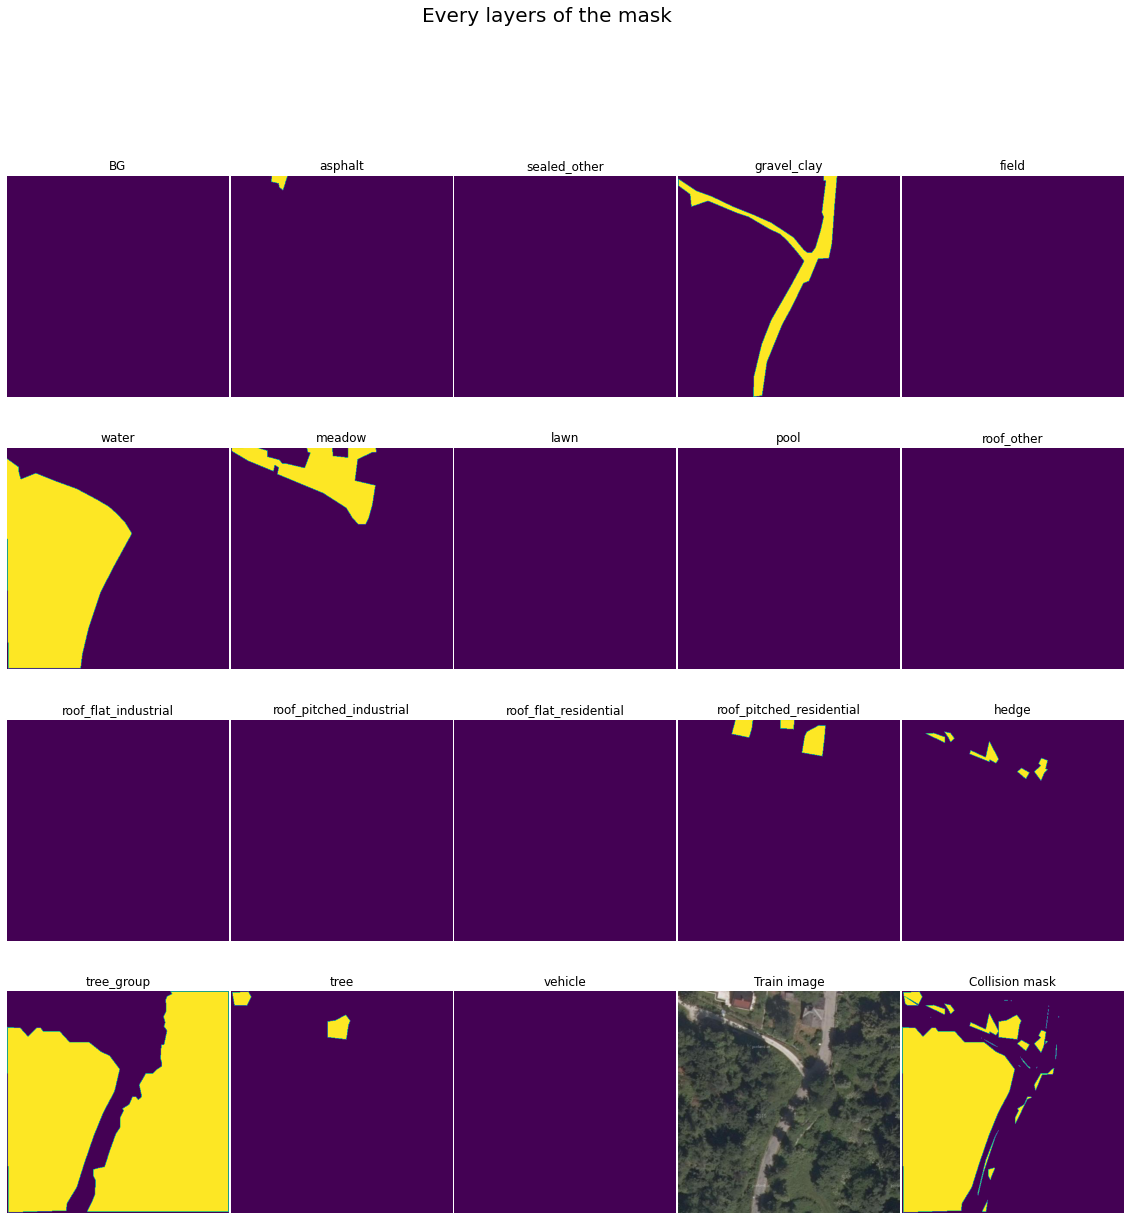

In [0]:
display_image(0)

### What can we learn from looking at the data
- there is a lot of collision between the labels
  - the most common seems to be tree or tree group with lawn or meadow, which is pretty logical.
  
Ideas:
- should we double count areas where there is tree and meadow for the CO2 and biodiversity score?

### Let's check collision ratio and label ratio in the all dataset

In [0]:
rows = []
columns = ['file name', 'collision_ratio']
for label in labels:
  columns.append(label+'_ratio')

for i in range(len(train_json)):
  json_path = Path('/dbfs/mnt/sdscdata/data/raw/train/', train_json[i])
  img_mask = mask_from_json(json_path)
  
  row = [train_json[i]]
  row.append(collision_ratio(img_mask))
  for label in labels:
    row.append(get_label_ratio(img_mask, label))
  rows.append(row)

df = pd.DataFrame(rows, columns=columns)

In [0]:
df.describe()

Out[12]:

,collision_ratio,BG_ratio,asphalt_ratio,sealed_other_ratio,gravel_clay_ratio,field_ratio,water_ratio,meadow_ratio,lawn_ratio,pool_ratio,roof_other_ratio,roof_flat_industrial_ratio,roof_pitched_industrial_ratio,roof_flat_residential_ratio,roof_pitched_residential_ratio,hedge_ratio,tree_group_ratio,tree_ratio,vehicle_ratio
count,340.000000,340.0,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.099853,0.0,0.245613,0.009340,0.038315,0.077367,0.010448,0.040543,0.204153,0.000577,0.001298,0.091424,0.015291,0.038570,0.053738,0.008361,0.114406,0.019308,0.013082
std,0.117131,0.0,0.157719,0.066309,0.106441,0.186341,0.054902,0.125828,0.201279,0.003236,0.004912,0.150262,0.082617,0.084665,0.081793,0.015140,0.144936,0.021265,0.016133
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027949,0.0,0.129075,0.000000,0.000000,0.000000,0.000000,0.000000,0.046070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016918,0.002327,0.000895
50%,0.057775,0.0,0.236219,0.000000,0.001637,0.000000,0.000000,0.000000,0.153212,0.000000,0.000000,0.000000,0.000000,0.004045,0.000000,0.001194,0.067888,0.013109,0.008047
75%,0.131371,0.0,0.331400,0.000000,0.021034,0.000000,0.000000,0.000000,0.300760,0.000000,0.000000,0.136857,0.000000,0.036826,0.086749,0.010439,0.151568,0.028724,0.018431
max,0.828537,0.0,0.771053,0.966278,0.908150,0.989292,0.409603,0.810604,0.963581,0.053062,0.052017,0.807777,0.951859,0.621109,0.475636,0.099522,0.993183,0.118145,0.118477


In [0]:
#index = df[df['asphalt_ratio'] == df['asphalt_ratio'].max()].index.to_list()[0]
#index = df[df['gravel_clay_ratio'] == df['gravel_clay_ratio'].max()].index.to_list()[0]
#index = df[df['sealed_other_ratio'] == df['sealed_other_ratio'].max()].index.to_list()[0]
#index = df[df['field_ratio'] == df['field_ratio'].max()].index.to_list()[0]
#index = df[df['lawn_ratio'] == df['lawn_ratio'].max()].index.to_list()[0]
#index = df[df['roof_flat_industrial_ratio'] == df['roof_flat_industrial_ratio'].max()].index.to_list()[0]
#index = df[df['roof_pitched_industrial_ratio'] == df['roof_pitched_industrial_ratio'].max()].index.to_list()[0]
#index = df[df['roof_flat_residential_ratio'] == df['roof_flat_residential_ratio'].max()].index.to_list()[0]
#index = df[df['tree_group_ratio'] == df['tree_group_ratio'].max()].index.to_list()[0]
index = df[df['collision_ratio'] == df['collision_ratio'].max()].index.to_list()[0]

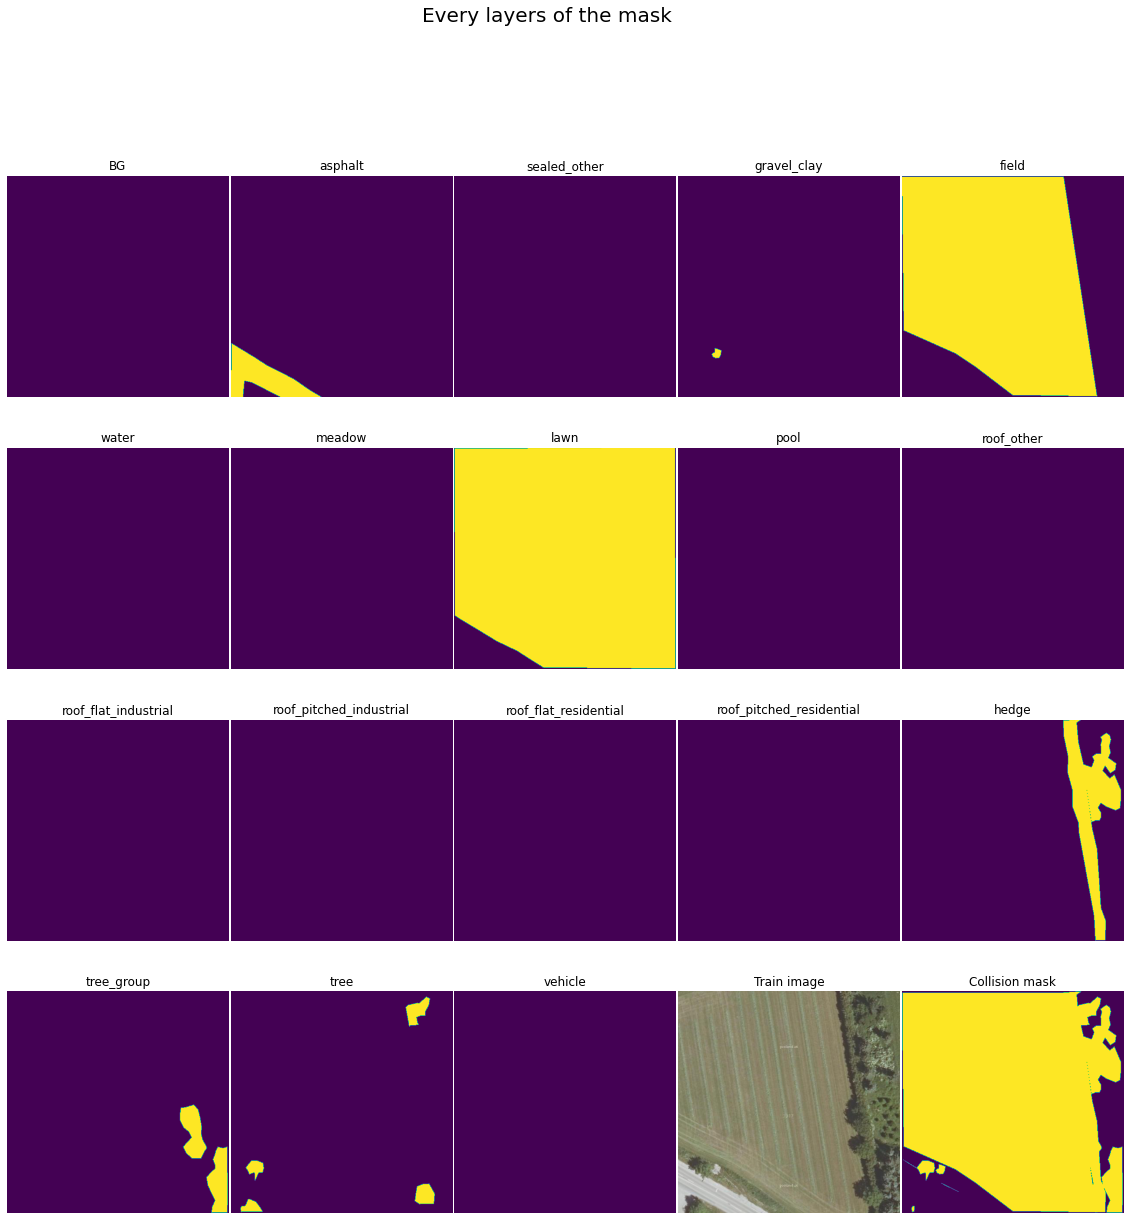

In [0]:
display_image(index)

In [0]:
df

Out[15]:

,file name,collision_ratio,BG_ratio,asphalt_ratio,sealed_other_ratio,gravel_clay_ratio,field_ratio,water_ratio,meadow_ratio,lawn_ratio,pool_ratio,roof_other_ratio,roof_flat_industrial_ratio,roof_pitched_industrial_ratio,roof_flat_residential_ratio,roof_pitched_residential_ratio,hedge_ratio,tree_group_ratio,tree_ratio,vehicle_ratio
0,46.588597200313345_14.267120361328125.json,0.342781,0.0,0.002888,0.000000,0.074280,0.0,0.365002,0.086231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019356,0.010742,0.744514,0.012440,0.000000
1,46.588597200313345_14.26849365234375.json,0.545197,0.0,0.000000,0.000000,0.038708,0.0,0.000000,0.000000,0.963581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533279,0.006088,0.000000
2,46.588597200313345_14.269866943359375.json,0.435131,0.0,0.000000,0.000462,0.047424,0.0,0.000000,0.746223,0.204678,0.000000,0.000000,0.000000,0.000000,0.004139,0.000000,0.000000,0.425259,0.000000,0.000000
3,46.5895409617622_14.267120361328125.json,0.169510,0.0,0.223969,0.000000,0.005150,0.0,0.000000,0.019703,0.410313,0.000000,0.000000,0.059311,0.000000,0.040806,0.153526,0.018364,0.108772,0.031883,0.010464
4,46.5895409617622_14.26849365234375.json,0.172657,0.0,0.087036,0.000000,0.005775,0.0,0.114727,0.000000,0.491276,0.001289,0.000000,0.000000,0.288555,0.000000,0.000000,0.000000,0.123322,0.009628,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,48.81138549984753_15.275802612304688.json,0.061211,0.0,0.448391,0.000000,0.020741,0.0,0.000000,0.000000,0.203049,0.000000,0.000000,0.000000,0.000000,0.054554,0.118652,0.009041,0.014416,0.041904,0.021790
336,48.81138549984753_15.277175903320312.json,0.109241,0.0,0.244694,0.000000,0.013725,0.0,0.000000,0.000000,0.309795,0.000645,0.001934,0.000000,0.000000,0.028339,0.207329,0.025536,0.089031,0.011089,0.001839
337,48.81228985866256_15.274429321289062.json,0.186943,0.0,0.686550,0.000000,0.174084,0.0,0.000000,0.020611,0.000000,0.000000,0.000000,0.242748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026581
338,48.81228985866256_15.275802612304688.json,0.081478,0.0,0.288387,0.000000,0.013031,0.0,0.000000,0.000000,0.243130,0.000507,0.000000,0.091591,0.000000,0.024734,0.161415,0.037773,0.057770,0.001404,0.014969


## Testing how to split the data

In [0]:
df

Out[16]:

,file name,collision_ratio,BG_ratio,asphalt_ratio,sealed_other_ratio,gravel_clay_ratio,field_ratio,water_ratio,meadow_ratio,lawn_ratio,pool_ratio,roof_other_ratio,roof_flat_industrial_ratio,roof_pitched_industrial_ratio,roof_flat_residential_ratio,roof_pitched_residential_ratio,hedge_ratio,tree_group_ratio,tree_ratio,vehicle_ratio
0,46.588597200313345_14.267120361328125.json,0.342781,0.0,0.002888,0.000000,0.074280,0.0,0.365002,0.086231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019356,0.010742,0.744514,0.012440,0.000000
1,46.588597200313345_14.26849365234375.json,0.545197,0.0,0.000000,0.000000,0.038708,0.0,0.000000,0.000000,0.963581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533279,0.006088,0.000000
2,46.588597200313345_14.269866943359375.json,0.435131,0.0,0.000000,0.000462,0.047424,0.0,0.000000,0.746223,0.204678,0.000000,0.000000,0.000000,0.000000,0.004139,0.000000,0.000000,0.425259,0.000000,0.000000
3,46.5895409617622_14.267120361328125.json,0.169510,0.0,0.223969,0.000000,0.005150,0.0,0.000000,0.019703,0.410313,0.000000,0.000000,0.059311,0.000000,0.040806,0.153526,0.018364,0.108772,0.031883,0.010464
4,46.5895409617622_14.26849365234375.json,0.172657,0.0,0.087036,0.000000,0.005775,0.0,0.114727,0.000000,0.491276,0.001289,0.000000,0.000000,0.288555,0.000000,0.000000,0.000000,0.123322,0.009628,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,48.81138549984753_15.275802612304688.json,0.061211,0.0,0.448391,0.000000,0.020741,0.0,0.000000,0.000000,0.203049,0.000000,0.000000,0.000000,0.000000,0.054554,0.118652,0.009041,0.014416,0.041904,0.021790
336,48.81138549984753_15.277175903320312.json,0.109241,0.0,0.244694,0.000000,0.013725,0.0,0.000000,0.000000,0.309795,0.000645,0.001934,0.000000,0.000000,0.028339,0.207329,0.025536,0.089031,0.011089,0.001839
337,48.81228985866256_15.274429321289062.json,0.186943,0.0,0.686550,0.000000,0.174084,0.0,0.000000,0.020611,0.000000,0.000000,0.000000,0.242748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026581
338,48.81228985866256_15.275802612304688.json,0.081478,0.0,0.288387,0.000000,0.013031,0.0,0.000000,0.000000,0.243130,0.000507,0.000000,0.091591,0.000000,0.024734,0.161415,0.037773,0.057770,0.001404,0.014969


In [0]:
np.array(df.iloc[:, 3:])

Out[17]: array([[2.88772583e-03, 0.00000000e+00, 7.42797852e-02, ...,
 7.44514465e-01, 1.24397278e-02, 0.00000000e+00],
 [0.00000000e+00, 0.00000000e+00, 3.87077332e-02, ...,
 5.33279419e-01, 6.08825684e-03, 0.00000000e+00],
 [0.00000000e+00, 4.61578369e-04, 4.74243164e-02, ...,
 4.25258636e-01, 0.00000000e+00, 0.00000000e+00],
 ...,
 [6.86550140e-01, 0.00000000e+00, 1.74083710e-01, ...,
 0.00000000e+00, 0.00000000e+00, 2.65808105e-02],
 [2.88387299e-01, 0.00000000e+00, 1.30310059e-02, ...,
 5.77697754e-02, 1.40380859e-03, 1.49688721e-02],
 [2.91805267e-01, 0.00000000e+00, 6.69860840e-03, ...,
 3.63693237e-02, 9.31167603e-03, 1.61972046e-02]])

In [0]:
from skmultilearn.model_selection import iterative_train_test_split
X_train, y_train, X_test, y_test = iterative_train_test_split(X = np.array(df[['file name', 'collision_ratio']]), y = np.array(df.iloc[:, 3:]), test_size = 0.25)

In [0]:
columns = []
for label in labels:
  columns.append(label+'_ratio')

y_train_df = pd.DataFrame(y_train, columns=columns[1:])
y_test_df = pd.DataFrame(y_test, columns=columns[1:])

In [0]:
y_train_df.describe()

Out[28]:

,asphalt_ratio,sealed_other_ratio,gravel_clay_ratio,field_ratio,water_ratio,meadow_ratio,lawn_ratio,pool_ratio,roof_other_ratio,roof_flat_industrial_ratio,roof_pitched_industrial_ratio,roof_flat_residential_ratio,roof_pitched_residential_ratio,hedge_ratio,tree_group_ratio,tree_ratio,vehicle_ratio
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,0.253457,0.009847,0.039663,0.080947,0.008912,0.039320,0.201222,0.000476,0.001126,0.087096,0.012558,0.038395,0.054352,0.008413,0.116891,0.018375,0.014319
std,0.162373,0.073833,0.109782,0.195053,0.048164,0.128368,0.200906,0.001438,0.004672,0.143488,0.074800,0.080027,0.083077,0.014945,0.141837,0.020074,0.016896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.131804,0.000000,0.000000,0.000000,0.000000,0.000000,0.043835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017536,0.002319,0.001799
50%,0.242962,0.000000,0.001637,0.000000,0.000000,0.000000,0.147959,0.000000,0.000000,0.000000,0.000000,0.003901,0.000000,0.001255,0.070805,0.011528,0.009947
75%,0.338728,0.000000,0.022219,0.000000,0.000000,0.000000,0.295945,0.000000,0.000000,0.130100,0.000000,0.038946,0.085224,0.010481,0.154282,0.028391,0.019492
max,0.771053,0.966278,0.908150,0.989292,0.377457,0.810604,0.963581,0.008881,0.052017,0.729599,0.951859,0.512688,0.475636,0.097668,0.993183,0.100826,0.118477


In [0]:
y_test_df.describe()

Out[29]:

,asphalt_ratio,sealed_other_ratio,gravel_clay_ratio,field_ratio,water_ratio,meadow_ratio,lawn_ratio,pool_ratio,roof_other_ratio,roof_flat_industrial_ratio,roof_pitched_industrial_ratio,roof_flat_residential_ratio,roof_pitched_residential_ratio,hedge_ratio,tree_group_ratio,tree_ratio,vehicle_ratio
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.222446,0.007842,0.034334,0.066794,0.014986,0.044155,0.212811,0.000874,0.001808,0.104205,0.023366,0.039086,0.051926,0.008207,0.107064,0.022062,0.009428
std,0.141445,0.036159,0.096389,0.158395,0.071336,0.118657,0.203310,0.005958,0.005560,0.168954,0.102372,0.097599,0.078321,0.015788,0.154356,0.024368,0.013049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117321,0.000000,0.000000,0.000000,0.000000,0.000000,0.049382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014969,0.002632,0.000088
50%,0.219685,0.000000,0.002058,0.000000,0.000000,0.000000,0.173103,0.000000,0.000000,0.000000,0.000000,0.004436,0.000000,0.001015,0.061718,0.014423,0.003740
75%,0.298495,0.000000,0.018357,0.000000,0.000000,0.000000,0.314407,0.000000,0.000000,0.171332,0.000000,0.028323,0.093054,0.009398,0.147440,0.033428,0.013321
max,0.620224,0.298538,0.641563,0.876514,0.409603,0.630405,0.919724,0.053062,0.038544,0.807777,0.646976,0.621109,0.276852,0.099522,0.848652,0.118145,0.059982
